In [1]:
import numpy as np
import os
import cv2
from glob import glob
import pandas as pd
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing

In [2]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger


In [3]:
# separando os dados
path_to_images = '../PANCS/*/*.jpg'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    trainingset.append(cv2.imread(i))
    traininglabels.append(i.split('/')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

In [ ]:
try:
    base_dir='../PANCS'
    
    train_dir=os.path.join(base_dir, 'training')
    os.mkdir(train_dir)
    train_taioba_dir=os.path.join(train_dir, 'taioba')
    os.mkdir(train_taioba_dir)
    trains_urtiga_dir=os.path.join(train_dir, 'urtiga')
    os.mkdir(trains_urtiga_dir)
    
    test_dir=os.path.join(base_dir, 'testing')
    os.mkdir(test_dir)
    test_taioba_dir=os.path.join(test_dir, 'taioba')
    os.mkdir(test_taioba_dir)
    test_urtiga_dir=os.path.join(test_dir, 'urtiga')
    os.mkdir(test_urtiga_dir)
    

except OSError:
    pass

Classes['Araruta' 'Beldroegão' 'Capiçoba' 'Capuchinha' 'Caruru' 'Ora-pro-nóbis'
 'Peixinho' 'Picão-preto' 'Serralha' 'Taioba' 'Urtiga']
11


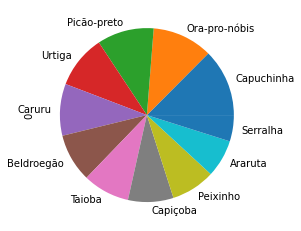

In [4]:
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
traininglabels[0].value_counts().plot(kind='pie')

In [5]:
trainingset.shape

(758, 128, 128, 3)

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    content=os.listdir(SOURCE)
    content=random.sample(content,len(content))
    for n,fname in enumerate(content):
        if(n<(SPLIT_SIZE*len(content)) and os.path.getsize(f"{SOURCE}/{fname}")!=0):
            copyfile(f"{SOURCE}/{fname}", f"{TRAINING}/{fname}")
        if(n>=(SPLIT_SIZE*len(content)) and os.path.getsize(f"{SOURCE}/{fname}")!=0):
            copyfile(f"{SOURCE}/{fname}", f"{TESTING}/{fname}")

# YOUR CODE ENDS HERE

#mudar paths
TAIOBA_SOURCE_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/Taioba"
TRAINING_TAIOBA_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/training/taioba"
TESTING_TAIOBA_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/testing/taioba"
URTIGA_SOURCE_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/Urtiga"
TRAINING_URTIGA_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/training/urtiga"
TESTING_URTIGA_DIR = "/content/drive/Shared drives/RAS Geral/RAS Projetos/2020.2/Detecção Vegetal/Datasets/PANCS/testing/urtiga"

split_size = .9
split_data(TAIOBA_SOURCE_DIR, TRAINING_TAIOBA_DIR, TESTING_TAIOBA_DIR, split_size)
split_data(URTIGA_SOURCE_DIR, TRAINING_URTIGA_DIR, TESTING_URTIGA_DIR, split_size)

In [ ]:
# Data augmentation for train images
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                    rotation_range=20, 
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='nearest'
                                  )

train_generator = train_datagen.flow_from_directory(
                TRAINING_DIR,  # This is the source directory for training images
                target_size=(128, 128),  # All images will be resized to 150x150
                batch_size=10,
                class_mode='categorical')

# Data augmentation for test images, only use rescale
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator =validation_datagen.flow_from_directory(
                    VALIDATION_DIR,  
                    target_size=(128, 128),  
                    batch_size=10,
                    class_mode='categorical')

In [7]:
model = Sequential([
    Conv2D(64, (5,5), input_shape = (128,128,3), activation = 'relu'),
    BatchNormalization(axis = 3),
    Conv2D(64, (5,5), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(axis = 3),
    Dropout(0.1),

    Conv2D(128, (5,5), activation = 'relu'),
    BatchNormalization(axis = 3),
    Conv2D(128, (5,5), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(axis = 3),
    Dropout(0.1),

    Conv2D(256, (5,5), activation = 'relu'),
    BatchNormalization(axis = 3),
    Conv2D(256, (5,5), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(axis = 3),
    Dropout(0.1),

    Flatten(),

    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(classes, activation = 'softmax')
]
)

In [ ]:
# Define the CNN model
adam = Adam(learning_rate = 0.001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Start training
history = model.fit_generator(TRAINING_DIR, 
                                steps_per_epoch = trainImages_count/batch_size, 
                                epochs=50,  
                                validation_data=testImages,
                                validation_steps=testImages_count/batch_size,
                                verbose = 1,
                                callbacks = [callback])
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.show()